In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers import Dense

DATA =  pd.read_csv('gdrive/My Drive/FINE_FOOD/Reviews.csv')
DATA.head()

Using TensorFlow backend.


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
def PARTION(score):
  if score<3:
    return 0
  return 1
 
ACTUAL_SCORE = DATA['Score']
NEW_SCORE = ACTUAL_SCORE.map(PARTION)
DATA['Score']=NEW_SCORE
DATA.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [0]:
TEXT = DATA['Text'].values

In [0]:

LABEL= DATA['Score'].values

In [0]:

from sklearn.model_selection import train_test_split
X_TRAIN , X_TEST , Y_TRAIN , Y_TEST = train_test_split(TEXT[0:50000],LABEL[0:50000],test_size = 0.3,random_state = 0,shuffle = False)

In [7]:
print("Shape of TRAIN DATA: {}".format(X_TRAIN.shape))
print("Shape of TEST DATA: {}".format(X_TEST.shape))

Shape of TRAIN DATA: (35000,)
Shape of TEST DATA: (15000,)


In [0]:
X_TRAIN[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [0]:
from nltk import FreqDist
WORD_DISTRIBUTION_TRAIN = FreqDist()

for text in X_TRAIN:
    WORD_DISTRIBUTION_TRAIN.update(text.split())

WORD_DISTRIBUTION_TRAIN= dict(WORD_DISTRIBUTION_TRAIN)

import operator
WORD_DISTRIBUTION_TRAIN = sorted(WORD_DISTRIBUTION_TRAIN.items(), key=operator.itemgetter(1),reverse = True)

RANK_DICT_TRAIN = {}
RANK = 1
for num in range(len(WORD_DISTRIBUTION_TRAIN)):
    i = WORD_DISTRIBUTION_TRAIN[num][0]
    RANK_DICT_TRAIN[i] = RANK
    RANK+=1

VECTOR_TRAIN= []
for sentence in X_TRAIN:
    rows = []
    for word in sentence.split():
      if RANK_DICT_TRAIN[word]<=5000 :
        rows.append(RANK_DICT_TRAIN[word])
    VECTOR_TRAIN.append(rows)
    
VECTOR_TEST= []
for sentence in X_TEST:
    rows = []
    for word in sentence.split():
      A=word in  RANK_DICT_TRAIN
      if A == True:
        if RANK_DICT_TRAIN[word]<=5000 :
          rows.append(RANK_DICT_TRAIN[word])
    VECTOR_TEST.append(rows)
        

In [10]:

from keras.preprocessing import sequence
max_review_length = 500
X_TRAIN = sequence.pad_sequences(VECTOR_TRAIN, maxlen=max_review_length)
X_TEST = sequence.pad_sequences(VECTOR_TEST, maxlen=max_review_length)

print(X_TRAIN.shape)
print(X_TRAIN[1])

(35000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [11]:
print("Shape of TRAIN DATA: {}".format(X_TRAIN.shape))
print("Shape of TEST DATA: {}".format(X_TEST.shape))

Shape of TRAIN DATA: (35000, 500)
Shape of TEST DATA: (15000, 500)


In [0]:
TOP_WORDS = 5000
EPOCH = 10
BATCH_SIZE = 64

In [0]:


embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(TOP_WORDS+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexch






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160032    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,333
Trainable params: 213,333
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
HISTORY=model.fit(X_TRAIN, Y_TRAIN, nb_epoch=10, batch_size=64, verbose=1,validation_data=(X_TEST,Y_TEST))
# Final evaluation of the model
#score = model.evaluate(X_TEST, Y_TEST, verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 591s 17ms/step - loss: 0.3252 - acc: 0.8742 - val_loss: 0.2757 - val_acc: 0.8893
Epoch 2/10
35000/35000 [==============================] - 590s 17ms/step - loss: 0.2195 - acc: 0.9128 - val_loss: 0.2590 - val_acc: 0.8952
Epoch 3/10
35000/35000 [==============================] - 606s 17ms/step - loss: 0.1949 - acc: 0.9249 - val_loss: 0.2635 - val_acc: 0.8929
Epoch 4/10
35000/35000 [==============================] - 618s 18ms/step - loss: 0.1748 - acc: 0.9329 - val_loss: 0.3279 - val_acc: 0.8829
Epoch 5/10
35000/35000 [==============================] - 633s 18ms/step - loss: 0.1531 - acc: 0.9420 - val_loss: 0.2947 - val_acc: 0.8887
Epoch 6/10
35000/35000 [==============================] - 619s 18ms/step - loss: 0.1360 - acc: 0.9486 - val_loss: 0.3443 - val_acc: 0.8911
Epoch 7/10
35000/35000 [==============================] - 630s 18ms/step - loss: 0.1777 - acc: 0.9312 - val_

In [0]:
score = model.evaluate(X_TEST, Y_TEST, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

Accuracy: 88.40%


In [0]:
#score = model.evaluate(X_TEST, Y_TETS, verbose=0)
#print("Accuracy: %.2f%%" % (score[1]*100))
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.3564115280419588
Test accuracy: 0.884


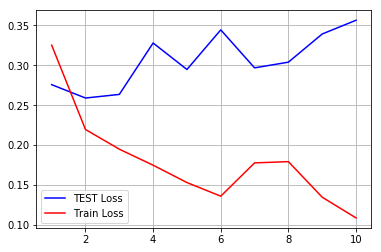

In [0]:
import matplotlib.pyplot as PLT
X = list(range(1,EPOCH +1))
TEST_LOSS = HISTORY.history['val_loss']
TRAIN_LOSS = HISTORY.history['loss']
PLT.plot(X,TEST_LOSS, 'b', label="TEST Loss")
PLT.plot(X, TRAIN_LOSS, 'r', label="Train Loss")
PLT.legend()
PLT.grid()


MODEL_2

In [0]:
embedding_vecor_length = 32
model_2 = Sequential()
model_2.add(Embedding(TOP_WORDS+1, embedding_vecor_length, input_length=max_review_length))
model_2.add(LSTM(100,return_sequences=True))
model_2.add(LSTM(50))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160032    
_________________________________________________________________
lstm_2 (LSTM)                (None, 500, 100)          53200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 243,483
Trainable params: 243,483
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
HISTORY_2=model_2.fit(X_TRAIN, Y_TRAIN, nb_epoch=10, batch_size=64,verbose=1,validation_data=(X_TEST,Y_TEST))
# Final evaluation of the model
score = model_2.evaluate(X_TEST, Y_TEST, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 1242s 35ms/step - loss: 0.3198 - acc: 0.8734 - val_loss: 0.2720 - val_acc: 0.8907
Epoch 2/10
35000/35000 [==============================] - 1203s 34ms/step - loss: 0.2143 - acc: 0.9156 - val_loss: 0.2591 - val_acc: 0.8903
Epoch 3/10
35000/35000 [==============================] - 1235s 35ms/step - loss: 0.1850 - acc: 0.9286 - val_loss: 0.2637 - val_acc: 0.8951
Epoch 4/10
35000/35000 [==============================] - 1217s 35ms/step - loss: 0.1606 - acc: 0.9373 - val_loss: 0.3066 - val_acc: 0.8787
Epoch 5/10
35000/35000 [==============================] - 1227s 35ms/step - loss: 0.1376 - acc: 0.9490 - val_loss: 0.3257 - val_acc: 0.8907
Epoch 6/10
35000/35000 [==============================] - 1236s 35ms/step - loss: 0.1201 - acc: 0.9566 - val_loss: 0.3282 - val_acc: 0.8885
Epoch 7/10
35000/35000 [==============================] - 1228s 35ms/step - loss: 0.0997 - acc: 0.9653 - val_l

Test score: 0.47076364204560717
Test accuracy: 0.8744666666666666


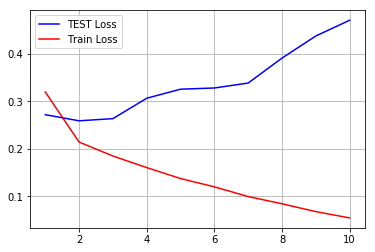

In [0]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
import matplotlib.pyplot as PLT
X = list(range(1,EPOCH +1))


TEST_LOSS = HISTORY_2.history['val_loss']
TRAIN_LOSS = HISTORY_2.history['loss']
PLT.plot(X,TEST_LOSS, 'b', label="TEST Loss")
PLT.plot(X, TRAIN_LOSS, 'r', label="Train Loss")
PLT.legend()
PLT.grid()


MODEL_3

In [23]:
embedding_vecor_length = 64
model_3 = Sequential()
model_3.add(Embedding(TOP_WORDS+1, embedding_vecor_length, input_length=max_review_length))
model_3.add(LSTM(80,return_sequences=True))
model_3.add(LSTM(50))
#model_3.add(LSTM(30))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_3.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 64)           320064    
_________________________________________________________________
lstm_12 (LSTM)               (None, 500, 80)           46400     
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)                26200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 392,715
Trainable params: 392,715
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
HISTORY_3=model_3.fit(X_TRAIN, Y_TRAIN, nb_epoch=10, batch_size=132,verbose=1,validation_data=(X_TEST,Y_TEST))
# Final evaluation of the model
score = model_3.evaluate(X_TEST, Y_TEST, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 622s 18ms/step - loss: 0.3373 - acc: 0.8704 - val_loss: 0.2819 - val_acc: 0.8843
Epoch 2/10
35000/35000 [==============================] - 624s 18ms/step - loss: 0.2181 - acc: 0.9127 - val_loss: 0.2585 - val_acc: 0.8943
Epoch 3/10
35000/35000 [==============================] - 624s 18ms/step - loss: 0.1878 - acc: 0.9263 - val_loss: 0.2659 - val_acc: 0.8865
Epoch 4/10
35000/35000 [==============================] - 622s 18ms/step - loss: 0.1642 - acc: 0.9371 - val_loss: 0.2859 - val_acc: 0.8921
Epoch 5/10
35000/35000 [==============================] - 618s 18ms/step - loss: 0.1384 - acc: 0.9491 - val_loss: 0.3305 - val_acc: 0.8884
Epoch 6/10
35000/35000 [==============================] - 615s 18ms/step - loss: 0.1190 - acc: 0.9570 - val_loss: 0.3255 - val_acc: 0.8891
Epoch 7/10
35000/35000 [==============================] - 609s 17ms/step - loss: 0.1092 - acc: 0.9615 - val_loss: 0.

Test score: 0.4325163844674826
Test accuracy: 0.8808


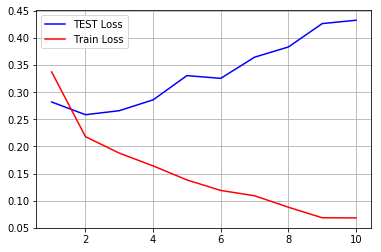

In [25]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
import matplotlib.pyplot as PLT
X = list(range(1,EPOCH +1))


TEST_LOSS = HISTORY_3.history['val_loss']
TRAIN_LOSS = HISTORY_3.history['loss']
PLT.plot(X,TEST_LOSS, 'b', label="TEST Loss")
PLT.plot(X, TRAIN_LOSS, 'r', label="Train Loss")
PLT.legend()
PLT.grid()


MODEL_4

In [14]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.regularizers import L1L2
reg = L1L2(0.01, 0.01)
embedding_vecor_length = 32
model_4 = Sequential()
model_4.add(Embedding(TOP_WORDS+1, embedding_vecor_length, input_length=max_review_length))
model_4.add(BatchNormalization())
model_4.add(LSTM(80,return_sequences=True,bias_regularizer=reg))
model_4.add(Dropout(0.4))
model_4.add(BatchNormalization())
model_4.add(LSTM(50))
model_4.add(Dropout(0.4))

model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_4.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160032    
_________________________________________________________________
batch_normalization_3 (Batch (None, 500, 32)           128       
_________________________________________________________________
lstm_3 (LSTM)                (None, 500, 80)           36160     
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 80)           0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 500, 80)           320       
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)               

In [15]:
HISTORY_4=model_4.fit(X_TRAIN, Y_TRAIN, nb_epoch=10, batch_size=132,verbose=1,validation_data=(X_TEST,Y_TEST))
# Final evaluation of the model
score = model_4.evaluate(X_TEST, Y_TEST, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Train on 35000 samples, validate on 15000 samples
Epoch 1/10





35000/35000 [==============================] - 605s 17ms/step - loss: 1.6548 - acc: 0.8628 - val_loss: 1.3343 - val_acc: 0.8853
Epoch 2/10
35000/35000 [==============================] - 596s 17ms/step - loss: 1.0542 - acc: 0.9048 - val_loss: 0.8783 - val_acc: 0.8977
Epoch 3/10
35000/35000 [==============================] - 595s 17ms/step - loss: 0.6508 - acc: 0.9271 - val_loss: 0.5761 - val_acc: 0.8953
Epoch 4/10
35000/35000 [==============================] - 594s 17ms/step - loss: 0.3636 - acc: 0.9425 - val_loss: 0.4167 - val_acc: 0.8975
Epoch 5/10
35000/35000 [==============================] - 599s 17ms/step - loss: 0.1596 - acc: 0.9589 - val_loss: 0.3509 - val_acc: 0.8963
Epoch 6/10
35000/35000 [==============================] - 598s 17ms/step - loss: 0.0927 - acc: 0.9686 - val_loss: 0.3741 - val_acc: 0.8956
Epoch 7/10
35000/35000 [==============================] - 595s 17ms/step - loss: 0.0728 - acc: 0.9753 - val_

Test score: 0.5315722901547949
Test accuracy: 0.8931999999682109


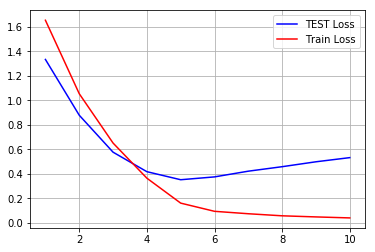

In [16]:

print('Test score:', score[0]) 
print('Test accuracy:', score[1])
import matplotlib.pyplot as PLT
X = list(range(1,EPOCH +1))


TEST_LOSS = HISTORY_4.history['val_loss']
TRAIN_LOSS = HISTORY_4.history['loss']
PLT.plot(X,TEST_LOSS, 'b', label="TEST Loss")
PLT.plot(X, TRAIN_LOSS, 'r', label="Train Loss")
PLT.legend()
PLT.grid()


MODEL_5

In [18]:
embedding_vecor_length = 20
model_5 = Sequential()
model_5.add(Embedding(TOP_WORDS+1, embedding_vecor_length, input_length=max_review_length))
model_5.add(BatchNormalization())
model_5.add(LSTM(40,return_sequences=True))
model_5.add(Dropout(0.5))
model_5.add(BatchNormalization())
model_5.add(LSTM(20))
model_5.add(Dropout(0.5))

model_5.add(Dense(1, activation='sigmoid'))
model_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_5.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 20)           100020    
_________________________________________________________________
batch_normalization_8 (Batch (None, 500, 20)           80        
_________________________________________________________________
lstm_8 (LSTM)                (None, 500, 40)           9760      
_________________________________________________________________
dropout_7 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 500, 40)           160       
_________________________________________________________________
lstm_9 (LSTM)                (None, 20)                4880      
_________________________________________________________________
dropout_8 (Dropout)          (None, 20)               

In [19]:
HISTORY_5=model_5.fit(X_TRAIN, Y_TRAIN, nb_epoch=10, batch_size=64,verbose=1,validation_data=(X_TEST,Y_TEST))
# Final evaluation of the model
score = model_5.evaluate(X_TEST, Y_TEST, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 1252s 36ms/step - loss: 0.3517 - acc: 0.8598 - val_loss: 0.2745 - val_acc: 0.8845
Epoch 2/10
35000/35000 [==============================] - 1246s 36ms/step - loss: 0.2434 - acc: 0.9040 - val_loss: 0.2599 - val_acc: 0.8899
Epoch 3/10
35000/35000 [==============================] - 1247s 36ms/step - loss: 0.2001 - acc: 0.9241 - val_loss: 0.2690 - val_acc: 0.8933
Epoch 4/10
35000/35000 [==============================] - 1251s 36ms/step - loss: 0.1667 - acc: 0.9388 - val_loss: 0.3116 - val_acc: 0.8957
Epoch 5/10
35000/35000 [==============================] - 1251s 36ms/step - loss: 0.1367 - acc: 0.9506 - val_loss: 0.3376 - val_acc: 0.8943
Epoch 6/10
35000/35000 [==============================] - 1254s 36ms/step - loss: 0.1110 - acc: 0.9616 - val_loss: 0.3833 - val_acc: 0.8929
Epoch 7/10
35000/35000 [==============================] - 1261s 36ms/step - loss: 0.0964 - acc: 0.9667 - val_l

Test score: 0.5067834332764148
Test accuracy: 0.8795333333651225


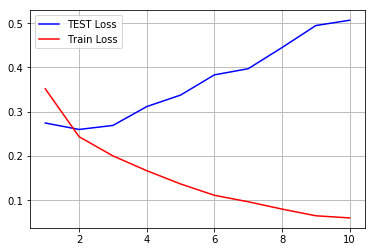

In [20]:
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
import matplotlib.pyplot as PLT
X = list(range(1,EPOCH +1))


TEST_LOSS = HISTORY_5.history['val_loss']
TRAIN_LOSS = HISTORY_5.history['loss']
PLT.plot(X,TEST_LOSS, 'b', label="TEST Loss")
PLT.plot(X, TRAIN_LOSS, 'r', label="Train Loss")
PLT.legend()
PLT.grid()


In [0]:
TEXT = DATA['Text'].values
LABEL= DATA['Score'].values
from sklearn.model_selection import train_test_split
X_TRAIN , X_TEST , Y_TRAIN , Y_TEST = train_test_split(TEXT[0:50000],LABEL[0:50000],test_size = 0.3,random_state = 0,shuffle = False)

In [0]:
from nltk import FreqDist
WORD_DISTRIBUTION_TRAIN = FreqDist()

for text in X_TRAIN:
    WORD_DISTRIBUTION_TRAIN.update(text.split())

WORD_DISTRIBUTION_TRAIN= dict(WORD_DISTRIBUTION_TRAIN)

import operator
WORD_DISTRIBUTION_TRAIN = sorted(WORD_DISTRIBUTION_TRAIN.items(), key=operator.itemgetter(1),reverse = True)

RANK_DICT_TRAIN = {}
RANK = 1
for num in range(len(WORD_DISTRIBUTION_TRAIN)):
    i = WORD_DISTRIBUTION_TRAIN[num][0]
    RANK_DICT_TRAIN[i] = RANK
    RANK+=1

VECTOR_TRAIN= []
for sentence in X_TRAIN:
    rows = []
    for word in sentence.split():
      if RANK_DICT_TRAIN[word]<=5000 :
        rows.append(RANK_DICT_TRAIN[word])
    VECTOR_TRAIN.append(rows)
    
VECTOR_TEST= []
for sentence in X_TEST:
    rows = []
    for word in sentence.split():
      A=word in  RANK_DICT_TRAIN
      if A == True:
        if RANK_DICT_TRAIN[word]<=5000 :
          rows.append(RANK_DICT_TRAIN[word])
    VECTOR_TEST.append(rows)
        

In [0]:


VECTOR_TEST= []
for sentence in X_TEST:
    rows = []
    for word in sentence.split():
      A=word in  RANK_DICT_TRAIN
      if A == True:
        if RANK_DICT_TRAIN[word]<=5000 :
          rows.append(RANK_DICT_TRAIN[word])
    VECTOR_TEST.append(rows)
        

In [0]:
len(VECTOR_TEST),len(VECTOR_TRAIN)

(15000, 35000)

In [0]:
from keras.preprocessing import sequence
max_review_length = 500
X_TRAIN = sequence.pad_sequences(VECTOR_TRAIN, maxlen=max_review_length)
X_TEST = sequence.pad_sequences(VECTOR_TEST, maxlen=max_review_length)

print(X_TRAIN.shape)
print(X_TRAIN[1])

(35000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [0]:
#%%time
from keras.regularizers import L1L2
reg = L1L2(0.01, 0.01)
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
max_review_length=500
embedding_vecor_length=32

TOP_WORDS = 5000
EPOCH = 10
BATCH_SIZE = 192

# Instantiate sequntial model
model = Sequential()

# Add Embedding Layer
model.add(Embedding(TOP_WORDS+1, embedding_vecor_length, input_length=max_review_length))

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.20))

# Add LSTM Layer 1
model.add(LSTM(100,return_sequences=True,bias_regularizer=reg))

# Add dropout
model.add(Dropout(0.20))

# Add LSTM Layer 2
model.add(LSTM(80,return_sequences=True,bias_regularizer=reg))

# Add dropout
model.add(Dropout(0.20))

# Add LSTM Layer 3
model.add(LSTM(60,return_sequences=True,bias_regularizer=reg))

# Add dropout
model.add(Dropout(0.30))

# Add LSTM Layer 4
model.add(LSTM(40,return_sequences=True,bias_regularizer=reg))

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.40))

# Add LSTM Layer 5
model.add(LSTM(20))

# Add dropout
model.add(Dropout(0.50))

# Add Dense Layer
model.add(Dense(1, activation='sigmoid'))


# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Run the model

#trained_model = model.fit(x_train, np.array(y_train), batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model Summary: 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160032    
_________________________________________________________________
batch_normalization_1 (Batch (None, 500, 32)           128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 100)          53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 500, 80)      

In [0]:
HISTORY_LATEST=model.fit(X_TRAIN, Y_TRAIN, nb_epoch=5, batch_size=164,verbose=1,validation_data=(X_TEST,Y_TEST))
score = model.evaluate(X_TEST, Y_TEST, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Train on 35000 samples, validate on 15000 samples
Epoch 1/5





35000/35000 [==============================] - 1154s 33ms/step - loss: 5.1628 - acc: 0.8489 - val_loss: 4.3666 - val_acc: 0.8619
Epoch 2/5
35000/35000 [==============================] - 1125s 32ms/step - loss: 3.5966 - acc: 0.8795 - val_loss: 3.0143 - val_acc: 0.8846
Epoch 3/5
35000/35000 [==============================] - 1114s 32ms/step - loss: 2.4080 - acc: 0.9046 - val_loss: 1.9859 - val_acc: 0.8883
Epoch 4/5
35000/35000 [==============================] - 1126s 32ms/step - loss: 1.5038 - acc: 0.9196 - val_loss: 1.2052 - val_acc: 0.8925
Epoch 5/5
35000/35000 [==============================] - 1116s 32ms/step - loss: 0.8163 - acc: 0.9344 - val_loss: 0.6528 - val_acc: 0.8908
Accuracy: 89.08%


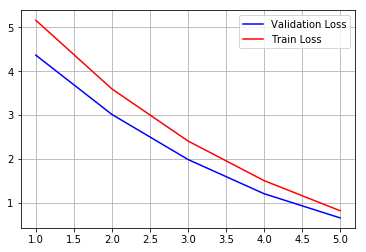

In [0]:

import matplotlib.pyplot as plt
#X = list(range(1,EPOCH +1))


x_axis_values = list(range(1,5 +1))

validation_loss = HISTORY_LATEST.history['val_loss']
train_loss = HISTORY_LATEST.history['loss']   
    
plt.plot(x_axis_values, validation_loss, 'b', label="Validation Loss")
plt.plot(x_axis_values, train_loss, 'r', label="Train Loss")
plt.legend()
plt.grid()
#fig.canvas.draw()


In [0]:
#%%time
from keras.regularizers import L1L2
reg = L1L2(0.01, 0.01)
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
max_review_length=500
embedding_vecor_length=32

TOP_WORDS = 5000
EPOCH = 10
BATCH_SIZE = 192

# Instantiate sequntial model
model = Sequential()

# Add Embedding Layer
model.add(Embedding(TOP_WORDS+1, embedding_vecor_length, input_length=max_review_length))

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.20))

# Add LSTM Layer 1
model.add(LSTM(100,return_sequences=True,bias_regularizer=reg))

# Add dropout
model.add(Dropout(0.20))

# Add LSTM Layer 2
model.add(LSTM(80,return_sequences=True,bias_regularizer=reg))

# Add dropout
model.add(Dropout(0.20))

# Add LSTM Layer 3
model.add(LSTM(60,return_sequences=True,bias_regularizer=reg))

# Add dropout
model.add(Dropout(0.30))

# Add LSTM Layer 4
model.add(LSTM(40,return_sequences=True,bias_regularizer=reg))

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.40))

# Add LSTM Layer 5
model.add(LSTM(20))

# Add dropout
model.add(Dropout(0.50))

# Add Dense Layer
model.add(Dense(1, activation='sigmoid'))


# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Run the model

#trained_model = model.fit(x_train, np.array(y_train), batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160032    
_________________________________________________________________
batch_normalization_3 (Batch (None, 500, 32)           128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 500, 100)          53200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 500, 80)           57920     
_________________________________________________________________
dropout_9 (Dropout)          (None, 5

In [0]:
HISTORY_LATEST=model.fit(X_TRAIN, Y_TRAIN, nb_epoch=10, batch_size=164,verbose=1,validation_data=(X_TEST,Y_TEST))
score = model.evaluate(X_TEST, Y_TEST, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 1136s 32ms/step - loss: 5.1976 - acc: 0.8499 - val_loss: 4.3214 - val_acc: 0.8439
Epoch 2/10
35000/35000 [==============================] - 1143s 33ms/step - loss: 3.6160 - acc: 0.8716 - val_loss: 3.0379 - val_acc: 0.8812
Epoch 3/10
35000/35000 [==============================] - 1130s 32ms/step - loss: 2.4148 - acc: 0.8995 - val_loss: 2.0051 - val_acc: 0.8918
Epoch 4/10
35000/35000 [==============================] - 1133s 32ms/step - loss: 1.5085 - acc: 0.9157 - val_loss: 1.2199 - val_acc: 0.8922
Epoch 5/10
35000/35000 [==============================] - 1127s 32ms/step - loss: 0.8248 - acc: 0.9297 - val_loss: 0.6647 - val_acc: 0.8958
Epoch 6/10
35000/35000 [==============================] - 1141s 33ms/step - loss: 0.3249 - acc: 0.9407 - val_loss: 0.3061 - val_acc: 0.8940
Epoch 7/10
35000/35000 [==============================] - 1131s 32ms/step - loss: 0.1369 - acc: 0.9505 - val_l

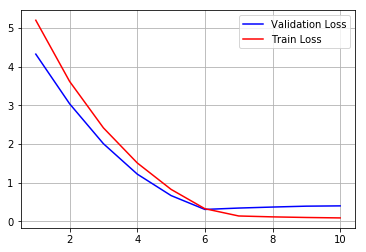

In [0]:

import matplotlib.pyplot as plt
#X = list(range(1,EPOCH +1))


x_axis_values = list(range(1,EPOCH +1))

validation_loss = HISTORY_LATEST.history['val_loss']
train_loss = HISTORY_LATEST.history['loss']   
    
plt.plot(x_axis_values, validation_loss, 'b', label="Validation Loss")
plt.plot(x_axis_values, train_loss, 'r', label="Train Loss")
plt.legend()
plt.grid()
#fig.canvas.draw()


# CONCLUSION:

In [26]:
from prettytable import PrettyTable
X=PrettyTable()
print(" "*40+"CONCLUSION")
print("="*100)
X.field_names = ["Model","Embedding Vector length",'Accuracy']
X.add_row(["One layer of LSTM(100 units)","32",'88%'])
X.add_row(["Two LSTM LAyer of 100 and 50 units ","32",'87%'])  
X.add_row(["Two LSTM layer of 80 and 50 units ","64",'88%'])  
X.add_row(["Two LSTM layer + BN + Dropout ","32",'89%'])  
X.add_row(["Two LSTM layer + BN + Dropout ","20",'87%'])  
X.add_row(["3 LSTM layer + BN + Dropout+ only 5 EPOCH ","32",'89%'])  
X.add_row([" SAME ABOVE  MODEL with 10 EPOCH ","32",'89.55%'])    
 
print(X)

                                        CONCLUSION
+--------------------------------------------+-------------------------+----------+
|                   Model                    | Embedding Vector length | Accuracy |
+--------------------------------------------+-------------------------+----------+
|        One layer of LSTM(100 units)        |            32           |   88%    |
|    Two LSTM LAyer of 100 and 50 units      |            32           |   87%    |
|     Two LSTM layer of 80 and 50 units      |            64           |   88%    |
|       Two LSTM layer + BN + Dropout        |            32           |   89%    |
|       Two LSTM layer + BN + Dropout        |            20           |   87%    |
| 3 LSTM layer + BN + Dropout+ only 5 EPOCH  |            32           |   89%    |
|      SAME ABOVE  MODEL with 10 EPOCH       |            32           |  89.55%  |
+--------------------------------------------+-------------------------+----------+


**Approach: **:


* First I split my data into train and test then performed following steps: 

1.Get vocab

2.Get frequency of each word 

3.Index each word.

4.Convert it into same format as we did in IMBD case.

  


 

**Observation:**

1. I have tried several model with different LSTM layers also played with epoch and embedding vector lentgh. But most of the time Train loss was decreasing but Test loss was not decreasing.

2. Then  I have used  Regularizers that allow to apply penalties on layer parameters.

3. After doing that (in model 4 and last two model,one with 5 epoch and similar model with 10 epoch) Both losses decreases significantly and give best accuracy of 89.55%(close to 90%).